# Анализ взаимодействия пользователей с карточками Яндекс.Дзен

**Описание данных**

Задача: сделать дашборд для менеджеров Яндекс.Дзена с анализом пользовательского взаимодействия с карточками статей.

Каждую карточку определяют её тема и источник (у него тоже есть тема). Примеры тем: «Красота и здоровье», «Россия», «Путешествия».

Пользователей системы характеризует возрастная категория. Скажем, «26-30» или «45+».
Есть три способа взаимодействия пользователей с системой:
- Карточка отображена для пользователя (show);
- Пользователь кликнул на карточку (click);
- Пользователь просмотрел статью карточки (view).

Каждую неделю перед менеджерами встают одни и те же вопросы:
- Сколько взаимодействий пользователей с карточками происходит в системе с разбивкой по темам карточек?
- Как много карточек генерируют источники с разными темами?
- Как соотносятся темы карточек и темы источников?

Дашборд будет основываться на пайплайне, который будет брать данные из таблицы, в которых хранятся сырые данные, трансформировать данные и укладывать их в агрегирующую таблицу. Пайплайн будет разработан дата-инженерами.

## Техническое задание

Бизнес-задача: анализ взаимодействия пользователей с карточками Яндекс.Дзен;

Насколько часто предполагается пользоваться дашбордом: не реже, чем раз в неделю;

Кто будет основным пользователем дашборда: менеджеры по анализу контента;

Состав данных для дашборда:
- История событий по темам карточек (два графика - абсолютные числа и процентное соотношение);
- Разбивка событий по темам источников;
- Таблица соответствия тем источников темам карточек;

По каким параметрам данные должны группироваться:
- Дата и время;
- Тема карточки;
- Тема источника;
- Возрастная группа;

Характер данных:
- История событий по темам карточек — абсолютные величины с разбивкой по минутам;
- Разбивка событий по темам источников — относительные величины (% событий);
- Соответствия тем источников темам карточек - абсолютные величины;

Важность: все графики имеют равную важность;

Источники данных для дашборда: cырые данные о событиях взаимодействия пользователей с карточками (таблица log_raw);

База данных, в которой будут храниться агрегированные данные: дополнительные агрегированные таблицы в БД zen;

Частота обновления данных: один раз в сутки, в полночь по UTC;

Какие графики должны отображаться и в каком порядке, какие элементы управления должны быть на дашборде (макет дашборда):

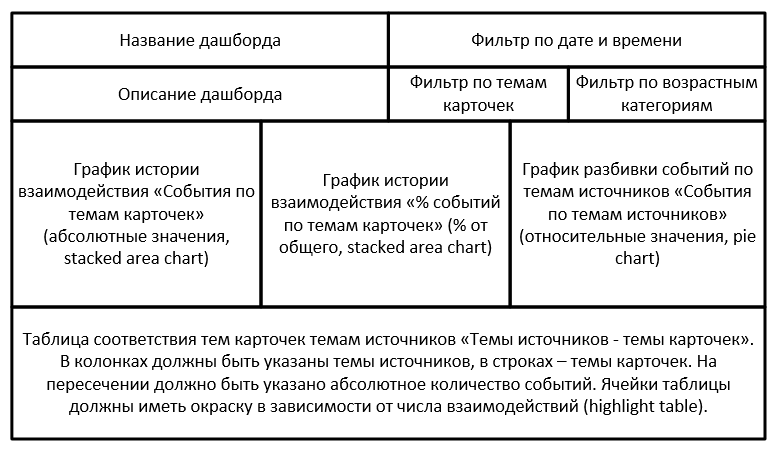

## Получение данных

### Подключение к базе данных

In [4]:
!pip install psycopg2

In [5]:
import pandas as pd
from sqlalchemy import create_engine

In [6]:
db_config = {'user': 'praktikum_student', # имя пользователя
            'pwd': 'Sdf4$2;d-d30pp', # пароль
            'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
            'port': 6432, # порт подключения
            'db': 'data-analyst-zen-project-db'} # название базы данных

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                db_config['pwd'],
                                                db_config['host'],
                                                db_config['port'],
                                                db_config['db'])

engine = create_engine(connection_string)

### SQL - запрос и выгрузка данных

In [7]:
query = '''
           SELECT *
           FROM dash_visits
        '''

dash_visits = pd.io.sql.read_sql(query, con = engine) 

dash_visits.to_csv('dash_visits.csv', index=False)

dash_visits.head(5) 

record_id item_topic source_topic age_segment                  dt  visits
0    1040597     Деньги         Авто       18-25 2019-09-24 18:32:00       3
1    1040598     Деньги         Авто       18-25 2019-09-24 18:35:00       1
2    1040599     Деньги         Авто       18-25 2019-09-24 18:54:00       4
3    1040600     Деньги         Авто       18-25 2019-09-24 18:55:00      17
4    1040601     Деньги         Авто       18-25 2019-09-24 18:56:00      27

*Продолжение в Tableau...*

https://public.tableau.com/app/profile/anna8205/viz/Ya_Dzen_dash/Dashboard1?publish=yes